# Masterclass Unsupervised analysis
## Hands on session 1 - Metrics and linkages
#### IenW | Data en Innovatielab | Oct 2024

Clustering is the process of grouping samples which is then used to determine the "natural" or "data driven" groupings in the data set. If clusters emerge, their properties can be summarized. Although various clustering methods can produce a partitioning of the samples in the data set, different methods yields in different groupings since each implicitly imposes a structure on the data.
#### In this notebook we will focus on distance metrics and linkage types.


In [4]:
# Install libraries
!pip install scatterd

In [5]:
# Load libraries
import sys, os
sys.path.append(os.path.join(os.getcwd(), "../src/"))
import matplotlib.pyplot as plt
import numpy as np
from scatterd import scatterd

<h4>Distance metrics and linkage types</h4>
The outcome in unsupervised analysis is determined by the the combination of "distance metric" and "linkage type". To define "when" or "how" two samples are similar, we need to define their intrinsic relationship; A (dis)similarity measure.

<br> A <b>similarity measure</b> for two objects, i, and j will be large when the objects are very similar. On the other hand, a <b>dissimilarity measure</b> will be large when the two objects are very dissimilar and small when they are similar, just like a distance measure between objects. Several distance measures are commonly used for computing the dissimilarity of objects described by numeric attributes. The measure that <b>your</b> use-case needs, depends on what you/domain experts defines "similar". Below are described five measures that form the basis of most other measures that are available.

<h4>The Euclidean distance between the two objects is defined as:</h4>
<img src="./img/eucl_eq.png",width=400,height=400>
<br>Let <b><i>i=(x_i1,x_i2,…,x_in,)</i></b> and <i><b>j=(x_j1,x_j2,…,x_jn,)</i></b> be two objects described by n numeric attributes.

[clustimage] >INFO> Add transparency to RGB colors (last column)
[datazets] >INFO> Add transparency to RGB colors (last column)
[datazets] >INFO> Set alpha based on density because of the parameter: [opaque]
[datazets] >INFO> Create scatterplot


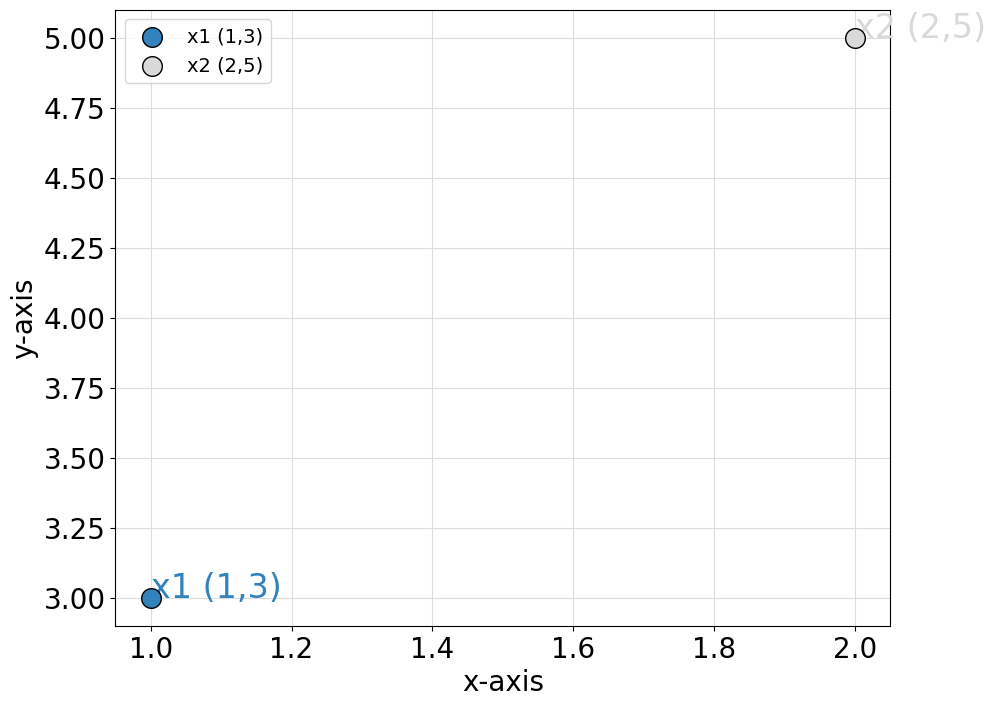

In [53]:
# Excercise 1:
# Given x1 and x2 in the figure below, what is the Euclidean Distance between x1 and x2?
out=scatterd([1,2],[3,5], s=200, figsize=(10, 8), labels=np.array(['x1 (1,3)','x2 (2,5)']), density=False)



### Answer:
<br>
a) 3.61
<br>
b) 25
<br>
c) 5
</b>


In [33]:
# Excercise 1: ANSWER:
# Create simple function to compute eucledian distance
from math import sqrt
def eucl_distance(x,y):
    eucdist=sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
    return(eucdist)

print("Answer is: %f" %eucl_distance([1,2],[3,5]))

Answer is: 3.605551


<hr>
<center><h4>The Manhattan distance is defined as:</h4>
<br>The distance between the two strings of equal length is the number of positions at which the corresponding symbols are different.</center>
<img src="./img/Manhattan_eq.png",width=350,height=350>
<img src="./img/Manhattan_distance.png",width=150,height=150>

<i>The Manhattan distance metric is also known as:
<br> - Manhattan length
<br> - rectilinear distance
<br> - L1 distance or L1 norm
<br> - city block distance
<br> - Minkowski’s L1 distance
<br> - taxi-cab metric
</i>



### Excercise 2:
#### Given x1 and x2 in the figure below, what is the Manhattan Distance between coordinates x1 and x2?
x1 = [1,2]
<br>
x2 = [3,5]

<i>Remember: Manhattan distance = |x1 – x2| + |y1 – y2|</i>

### Answer:
<b>
a) 3
<br>
b) 6
<br>
c) 5
</b>

In [34]:
# Excercise 2: ANSWER:
# Create simple function to compute manhattan distance
def manhattan_distance(x,y):
     return sum(abs(a-b) for a,b in zip(x,y))

print("Answer is: %d" %manhattan_distance([1,2],[3,5]))

Answer is: 5


<hr>
<center><h3>Note that The <u>Minkowski distance</u> is a generalized metric form of Euclidean distance and Manhattan distance</h3></center>

<i>Different names for the Minkowski distance or Minkowski metric arise from the order</i>

λ = 1 is the Manhattan distance.
<br><i>Synonyms are L1-Norm, Taxicab or City-Block distance. For two vectors of ranked ordinal variables, the Manhattan distance is sometimes called Foot-ruler distance.</i>
<br><br>
λ = 2 is the Euclidean distance.
<br><i>Synonyms are L2-Norm or Ruler distance. For two vectors of ranked ordinal variables, the Euclidean distance is sometimes called Spear-man distance.</i>
<br><br>
λ = ∞ is the Chebyshev distance.
<br><i>Synonyms are Lmax-Norm or Chessboard distance.</i>
<br><br>
<b>Although it is defined for any λ > 0, it is rarely used for values other than 1, 2 and ∞.</b>


In [35]:
# Excercise 2: ANSWER:
# Create simple function to compute minkowski distance

from decimal import Decimal

def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)

def minkowski_distance(x,y,p_value):
    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)

# Examples with different lambda
print("Minkowski with lambda=1: %d" %minkowski_distance([1,2],[3,5],1))
print("Minkowski with lambda=2: %f" %minkowski_distance([1,2],[3,5],2))
print("Minkowski with lambda=3 is: %f" %minkowski_distance([1,2],[3,5],3))
print("Minkowski with lambda=100 is: %f" %minkowski_distance([1,2],[3,5],100))

Minkowski with lambda=1: 5
Minkowski with lambda=2: 3.606000
Minkowski with lambda=3 is: 3.271000
Minkowski with lambda=100 is: 3.000000


<hr>
<center><h3>Hamming distance</h3></center>
<center><br><b>The Hamming distance between the two objects is defined as:</b></center>
<img src="./img/Hamming.png",width=250,height=250>

<center>
<br>
<br>"Data en Innovatielab" and "Data & Innovatielab" is 2.
<br>1011101 and 10<b>0</b>1<b>0</b>01 is 2.
<br>2173896 and 2<b>23</b>3<b>7</b>96 is 3.
</center>


In [37]:
# Calculate the Hamming distance between two strings
def hamming_distance(s1, s2):
    assert len(s1) == len(s2)
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

a = 'Data en Innovatielab'
b = 'Dete en Innovatielab'
print("Hamming distance: %d" %hamming_distance(a,b))

Hamming distance: 2


#### Many different distance measures are readily in the <u>SCIPY</u> package


In [47]:
# Load distances from SCIPy
import scipy.spatial.distance as scdist

a = 'Data en Innovatielab'
b = 'Dete en Innovatielab'

print("Euclidean distance: %f" %scdist.euclidean([1,2],[3,5]))
print("Minkowski distance with lambda=2: %f" %scdist.minkowski([1,2],[3,5],2))
print("Manhattan distance: %d" %scdist.cityblock([1,2],[3,5]))
print("Minkowski distance with lambda=1: %d" %scdist.minkowski([1,2],[3,5],1))


Euclidean distance: 3.605551
Minkowski distance with lambda=2: 3.605551
Manhattan distance: 5
Minkowski distance with lambda=1: 5


In [ ]:
# Fin